<a href="https://colab.research.google.com/github/szh141/colab/blob/main/sklearn_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage import data,io
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
area_small = np.random.normal(3,1,100)
elongation_small = np.random.normal(3,1,100)
area_large = np.random.normal(8,1,100)
elongation_large = np.random.normal(8,1,100)


In [ ]:
area = np.concatenate((area_small, area_large))
elongation = np.concatenate((elongation_small, elongation_large))
data = [area,elongation]
data = np.array(data)
data = data.T
data.shape

(200, 2)

list can only append

In [ ]:
data1 = data[::10]
manual_annotation = []
for i in range(10):
  manual_annotation.append(1)
for i in range(10,20):
  manual_annotation.append(2)
manual_annotation

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

paint colored dots over the grey ones, the reverse is won't show color dots

plt.scatter(.....,c=color)
c is cmap for short
color is a list

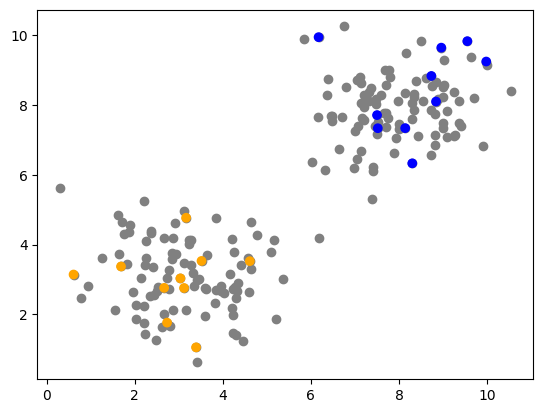

In [ ]:
plt.scatter(data[:,0],data[:,1],c='gray')
colors = ['orange','blue']
color = []
for i in manual_annotation:
  color.append(colors[i-1])
plt.scatter(data1[:,0],data1[:,1],c=color)


In [ ]:
df = pd.DataFrame(data1)

In [ ]:
df['annotation'] = manual_annotation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   0           20 non-null     float64
 1   1           20 non-null     float64
 2   annotation  20 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 608.0 bytes


In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df)

ML, 20 training data is enough?!

In [ ]:
train

,0,1,annotation
13,7.501620,7.711097,2
9,3.516632,3.531567,1
12,9.980004,9.246549,2
0,2.668411,2.759856,1
14,7.518627,7.335500,2
1,0.611684,3.142377,1
6,1.689310,3.372717,1
5,2.734133,1.763791,1
2,3.167070,4.769503,1
15,6.174256,9.944847,2


In [ ]:
train_data = train.drop('annotation', axis=1)
validation_data = test.drop('annotation', axis=1)

train_annotation = train['annotation']
validation_annotation = test['annotation']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score, accuracy_score, precision_score, recall_score

classifier = RandomForestClassifier()
classifier.fit(train_data, train_annotation)

RandomForestClassifier()

In [ ]:
result = classifier.predict(validation_data)
print(result)
print(validation_annotation)

[2 1 2 1 2]
16    2
7     1
10    2
8     1
19    2
Name: annotation, dtype: int64


In [ ]:
result_entire = classifier.predict(data)
result_entire

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

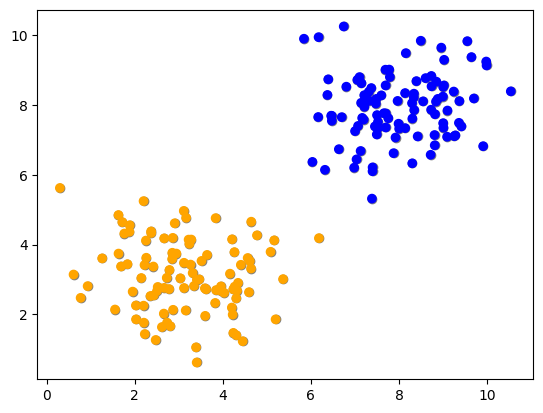

In [ ]:
colors = ['orange','blue']
color = []
for i in result_entire:
  color.append(colors[i-1])
plt.scatter(data[:,0],data[:,1],c=color)
